# Deep Q Learning

In [1]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

Using TensorFlow backend.
/Users/ramimostafa/anaconda3/envs/cs285_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ramimostafa/anaconda3/envs/cs285_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ramimostafa/anaconda3/envs/cs285_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
import StockTradingEnv as myEnv
import pandas as pd

In [3]:
ENV_NAME = 'CartPole-v0'

# Get the environment and extract the number of actions available in the Cartpole problem
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)


[123]

In [4]:
apl = pd.read_csv("AAPL.csv")

In [5]:
x = [math.sin(x/100) * 1000 + 2000 for x in range(len(apl))]
apl["Open"]  = x
apl["Close"]  = x

In [6]:
env = myEnv.StockTradingEnv(apl)
nb_actions = env.action_space.n

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
________________________________________________

In [10]:
policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this slows down training quite a lot. 
dqn.fit(env, nb_steps=100000, visualize=False, verbose=2)

Training for 100000 steps ...


/Users/ramimostafa/anaconda3/envs/cs285_env/lib/python3.7/site-packages/keras_rl-0.4.2-py3.7.egg/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step:  3000
Step:  4000
Step:  5000
Step:  1000
Step:  2000
Step

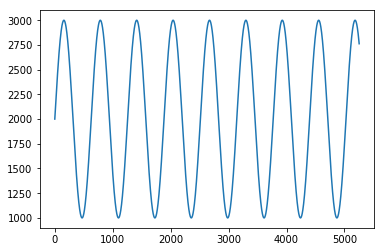

In [23]:
plt.plot(apl["Open"])

Text(0.5,1,'Profit from market')

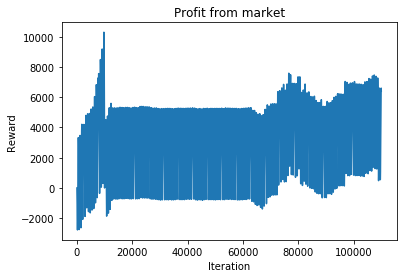

In [11]:
plt.plot(env.p)
plt.xlabel("Iteration")
plt.ylabel("Reward")
plt.title("Profit from market")

In [9]:
#dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Step: 4469
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4470
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4471
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4472
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4473
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4474
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net wor

Step: 4565
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4566
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4567
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4568
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4569
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4570
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 4673
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4674
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4675
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4676
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4677
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4678
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 4803
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4804
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4805
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4806
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4807
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4808
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 4938
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4939
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4940
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4941
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4942
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4943
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 5039
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5040
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5041
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5042
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5043
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5044
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 5123
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5124
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5125
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5126
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5127
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5128
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 5226
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5227
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5228
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5229
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5230
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 5231
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 90
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 91
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 92
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 93
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 94
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 95
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 96
Balance

Step: 204
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 205
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 206
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 207
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 208
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 209
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 210


Step: 303
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 304
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 305
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 306
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 307
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 308
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 309


Step: 424
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 425
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 426
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 427
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 428
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 429
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 430


Step: 550
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 551
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 552
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 553
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 554
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 555
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 556


Step: 674
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 675
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 676
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 677
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 678
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 679
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 680


Step: 797
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 798
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 799
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 800
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 801
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 802
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 803


Step: 905
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 906
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 907
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 908
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 909
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 910
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 911


Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1024
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1025
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1026
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1027
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1028
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1029
Balance: 10000.0
Shar

Step: 1141
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1142
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1143
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1144
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Step: 1145
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1146
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1147
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1148
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1149
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 1150
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

KeyboardInterrupt: 

In [6]:
import random
import tensorflow as tf
import numpy as np

In [ ]:
class Model:
    def __init__(self, learning_rate=0.1, discount=0.95, exploration_rate=1.0, iterations=10000):
        self.learning_rate = learning_rate
        self.discount = discount # How much we appreciate future reward over current
#         self.exploration_rate = 1.0 # Initial exploration rate
#         self.exploration_delta = 1.0 / iterations # Shift from exploration to explotation

        # Input has five neurons, each represents single game state (0-4)
        self.input_count = 10
        # Output is two neurons, each represents Q-value for action (1 and 0)
        self.output_count = 1

        self.session = tf.Session()
        self.define_model()
        self.session.run(self.initializer)

    # Define tensorflow model graph
    def define_model(self):
        # Input is an array of 5 items (state one-hot)
        # Input is 2-dimensional, due to possibility of batched training data
        # NOTE: In this example we assume no batching.
        self.model_input = tf.placeholder(dtype=tf.float32, shape=[None, self.input_count])

        # Two hidden layers of 16 neurons with sigmoid activation initialized to zero for stability
        fc1 = tf.layers.dense(self.model_input, 16, activation=tf.sigmoid, kernel_initializer=tf.constant_initializer(np.zeros((self.input_count, 16))))
        fc2 = tf.layers.dense(fc1, 16, activation=tf.sigmoid, kernel_initializer=tf.constant_initializer(np.zeros((16, self.output_count))))

        # Output is two values, Q for both possible actions FORWARD and BACKWARD
        # Output is 2-dimensional, due to possibility of batched training data
        # NOTE: In this example we assume no batching.
        self.model_output = tf.layers.dense(fc2, self.output_count)

        # This is for feeding training output (a.k.a ideal target values)
        self.target_output = tf.placeholder(shape=[None, self.output_count], dtype=tf.float32)
        # Loss is mean squared difference between current output and ideal target values
        loss = tf.losses.mean_squared_error(self.target_output, self.model_output)
        # Optimizer adjusts weights to minimize loss, with the speed of learning_rate
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate).minimize(loss)
        # Initializer to set weights to initial values
        self.initializer = tf.global_variables_initializer()

    # Ask model to estimate Q value for specific state (inference)
    def get_Q(self, state):
        # Model input: Single state represented by array of 5 items (state one-hot)
        # Model output: Array of Q values for single state
        return self.session.run(self.model_output, feed_dict={self.model_input: self.to_one_hot(state)})[0]

    # Turn state into 2d one-hot tensor
    # Example: 3 -> [[0,0,0,1,0]]
    def to_one_hot(self, state):
        one_hot = np.zeros((1, 5))
        one_hot[0, [state]] = 1
        return one_hot

    def get_next_action(self, state):
        if random.random() > self.exploration_rate: # Explore (gamble) or exploit (greedy)
            return self.greedy_action(state)
        else:
            return self.random_action()

    # Which action (FORWARD or BACKWARD) has bigger Q-value, estimated by our model (inference).
    def greedy_action(self, state):
        # argmax picks the higher Q-value and returns the index (FORWARD=0, BACKWARD=1)
        return np.argmax(self.get_Q(state))

    def random_action(self):
        return 0 if random.random() < 0.5 else 1

    def train(self, old_state, action, reward, new_state):
        # Ask the model for the Q values of the old state (inference)
        old_state_Q_values = self.get_Q(old_state)

        # Ask the model for the Q values of the new state (inference)
        new_state_Q_values = self.get_Q(new_state)

        # Real Q value for the action we took. This is what we will train towards.
        old_state_Q_values[action] = reward + self.discount * np.amax(new_state_Q_values)
        
        # Setup training data
        training_input = self.to_one_hot(old_state)
        target_output = [old_state_Q_values]
        training_data = {self.model_input: training_input, self.target_output: target_output}

        # Train
        self.session.run(self.optimizer, feed_dict=training_data)

    def update(self, old_state, new_state, action, reward):
        # Train our model with new data
        self.train(old_state, action, reward, new_state)

        # Finally shift our exploration_rate toward zero (less gambling)
        if self.exploration_rate > 0:
            self.exploration_rate -= self.exploration_delta
view rawdeep_gambler.py hosted with ❤ by GitHub